# Informatics 1 Cognitive Science (2017–2018)
## Assignment 2: Clustering and Categorization

------------------------

## Answering questions
The assignment notebooks include a combination of instructions, code that has been written for you to use, run, or examine, and questions you need to answer.

### Code
In every place where you need to write code you will see:

    YOUR CODE HERE

    raise NotImplementedError()

or

    YOUR CODE HERE

Delete the raise NotImplementedError() (if applicable) and write your solution code inside the marked cell.

### Text
For questions that require you to write text the cell will say YOUR ANSWER HERE. Again delete that line if you want to answer the question and write your response in the marked cell.

Most of the cells that already contained text or calculations will be read-only. You can open new cells for additional calculation or notes, however these cells will not be part of your submission and will not be considered for marking! Thus, make sure that all your solutions are contained in the marked cells.

------------------------


# Introduction

In this task you will induce semantic categories for a set of words by clustering them into sets of semantically related words. You will cluster the words on the basis of their
representations in a space of semantic features, applying **agglomerative hierarchical clustering**. We
will use the [**linkage**](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) function from scikit-learn to do the clustering:

$$\mathbf{Z} = \mathbf{linkage}(\mathbf{X},\mathbf{method},\mathbf{metric})$$

The function performs agglomerative hierarchical clustering of the rows of matrix **X**
and returns tree **Z** encoding a dendrogram of the resulting hierarchical clusters. 
The argument **method** describes the clustering criterion, i.e., how to measure the distance
between clusters. 

In the lectures, we discussed three different clustering criteria:

- **single-linkage**, (called 'single' in scikit-learn)
- **complete-linkage**, ('complete')
- **group average**, ('average')
The argument **metric** specifies the function that will be used to compute distances between the rows of **X**. We will use cosine distance (via the argument 'cosine')[(*1)](#References).

## A simple example
Let's first go through an example to show what you'll need to know for task 1. 

In [3]:
# import numpy, the python scientific package
import numpy as np

# import maplotlib to plot the visualizations
from matplotlib import pyplot as plt
#this is to output the plots in the notebook
%matplotlib inline

In [4]:
'''
Assume we are given matrix contains features for four letters. 
Each letter's features are a row in the matrix A. 

In this case, the features are made up and don't have any particular
interpretation.
'''

A = np.matrix([[1,2,3],[1,2,5],[7,1,-5],[3,4,6]])
print(A)

[[ 1  2  3]
 [ 1  2  5]
 [ 7  1 -5]
 [ 3  4  6]]


In [5]:
# The letters are defined in:
letters = ['a','o','k','e']
print(letters)

['a', 'o', 'k', 'e']


We'll now do hierarchical clustering on the data using the single-linkage criterion.


In [6]:
# First, import the linkage function from scipy library
from scipy.cluster.hierarchy import linkage

'''
Now, we use the linkage function on the feature matrix A,
with our chosen criterion and distance function: 
'''

TreeA = linkage(A,'single','cosine')

Now we have two options to further inspect the clustering. 

### Visualising dendograms

The first option is to view the corresponding dendrogram. Try it out and make sure you understand how to read it.

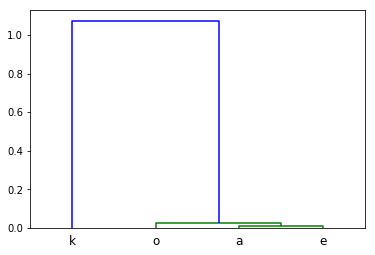

In [7]:
# import the dendrogram function from scipy
from scipy.cluster.hierarchy import dendrogram

dendrogram(TreeA, labels=letters, orientation= 'top');

### Working with clusters
The second option is to obtain the clusters at a certain height in the tree. This is done with the function **fcluster**, where we have to specify the maximum number **t** of the resulting clusters.

The function returns a column vector **clustering** of size 4, where row i contains the cluster assignment of row (item) i of matrix A. 

Try it out with an increasing number of maximum clusters, starting with t=1. 

In [8]:
# import the flat cluster function from scipy
from scipy.cluster.hierarchy import fcluster

In [333]:
clustering = fcluster(TreeA,t=5, criterion= 'maxclust')

In [334]:
for letter, cluster in zip(letters, clustering):
    print (letter,':', cluster)

a : 1
o : 1
k : 2
e : 1


Compare it with the dendrogram of your clustering and discuss briefly.

>The cluster matches the dendrogram with k being in its own cluster and the other three letters being in another cluster

## Loading the data

For our task, you will use the data relating to Task 1. Let's load the files we'll need to the notebook.

In [11]:
''' First, we import the pandas [pandas.pydata.org] library,a useful package for data analysis. 
If you don't have conda installed, type: 
"conda install pandas" 
in the terminal in your cogsci environment. 
'''
import pandas as pd 

# edit the pandas display options
pd.set_option('display.max_columns', 12)

In [12]:
# then we import the different files relating to Task 1
words1 = pd.read_csv("./words1.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()

matrix1_mcrae = pd.read_csv("./matrix1_mcrae.csv", index_col=0).as_matrix()
matrix1_bnc = pd.read_csv("./matrix1_bnc.csv", index_col=0).as_matrix()

### About the data
You've just loaded the words we want to cluster, in **words1**. These are the the 44 most frequently-occurring content words in the British National Corpus [(BNC)[1]](#References). You can see what each word is (e.g., banana, boat) by printing the **words1** matrix. 

You have also loaded two matrices of features: **matrix1_mcrae** and **matrix1_bnc**

Each of the two matrices represents a different set of features for the words in **words1**.

**matrix1 bnc** is a 44×2497 matrix where each row contains features for the corresponding word in **words1**. The features are the number of times a target word co-occurs with a context word in the BNC, using a context window of ± 5 words. 

**matrix1_mcrae** is a 44 × 2526 matrix where each row contains features for the corresponding word in **words1**. The  features are based on judgments by humans in a "norming" study conducted by [McRae et al. [2]](#References). 

The list of features can be seen in **feats_mcrae**. To do this, you can print **feats_mcrae** in the cell below. Notice that there are many features, so they won't print all at once. Remember that you can print specific entries in a matrix using notation like `feats_mcrae[200:240]` -- that will product the 200th through the 240th features in the McRae corpus.

Each matrix cell in **matrix1_mcrae** corresponds to the number of humans that listed a feature for a given target word. (You have already worked with McRae et al.’s data in assignment 1).

Start by inspecting the data (e.g. using the print() command) and make sure you understand what each file contains.

In [13]:
print(words1)
print(feats_mcrae[200:240])
print(matrix1_mcrae)
print(matrix1_bnc)

['banana' 'boat' 'bottle' 'bowl' 'car' 'cat' 'cherry' 'chicken' 'chisel'
 'corn' 'cow' 'cup' 'dog' 'duck' 'eagle' 'elephant' 'hammer' 'helicopter'
 'kettle' 'knife' 'lettuce' 'lion' 'motorcycle' 'mushroom' 'onion' 'owl'
 'peacock' 'pear' 'pen' 'pencil' 'penguin' 'pig' 'pineapple' 'potato'
 'rocket' 'scissors' 'screwdriver' 'ship' 'snail' 'spoon' 'swan'
 'telephone' 'truck' 'turtle']
['associated_with_the_house_of_god' 'associated_with_training'
 'associated_with_vampires' 'associated_with_winning'
 'associated_with_winter' 'associated_with_witches' 'becomes_a_butterfly'
 'beh_-_bahs' 'beh_-_bark_peals_off' 'beh_-_barks' 'beh_-_bites'
 'beh_-_branches_droop_down' 'beh_-_breathes' 'beh_-_builds_dams'
 'beh_-_builds_nests' 'beh_-_burrows' 'beh_-_buzzes' 'beh_-_cannot_fly'
 'beh_-_caws' 'beh_-_chases' 'beh_-_chases_cats' 'beh_-_chews_on_wood'
 'beh_-_chirps' 'beh_-_climbs' 'beh_-_climbs_trees' 'beh_-_clucks'
 'beh_-_cocoons' 'beh_-_communicates' 'beh_-_coos' 'beh_-_crawls'
 'beh_-_croaks' 

# Task 1: Semantic Categories

## Question 1 (15%): 
a) Cluster the target words on the basis of the vector representations obtained from the BNC. 
Do this by using all three clustering criteria (single-linkage, complete-linkage, and average-linkage). 
Show the dendrogram output for each criterion. Make sure the plots are readable. You can use multiple cells to plot each tree.

           Word  cluster
0        banana        8
1          boat       17
2        bottle       12
3          bowl       10
4           car       20
5           cat       15
6        cherry       27
7       chicken        4
8        chisel       33
9          corn       42
10          cow       24
11          cup       37
12          dog       15
13         duck        2
14        eagle       34
15     elephant       23
16       hammer       26
17   helicopter       19
18       kettle       11
19        knife       28
20      lettuce       14
21         lion       30
22   motorcycle       22
23     mushroom        6
24        onion        7
25          owl       38
26      peacock       40
27         pear        9
28          pen        1
29       pencil        1
30      penguin       41
31          pig       16
32    pineapple       25
33       potato        5
34       rocket       29
35     scissors       32
36  screwdriver       31
37         ship       18
38        snail       39


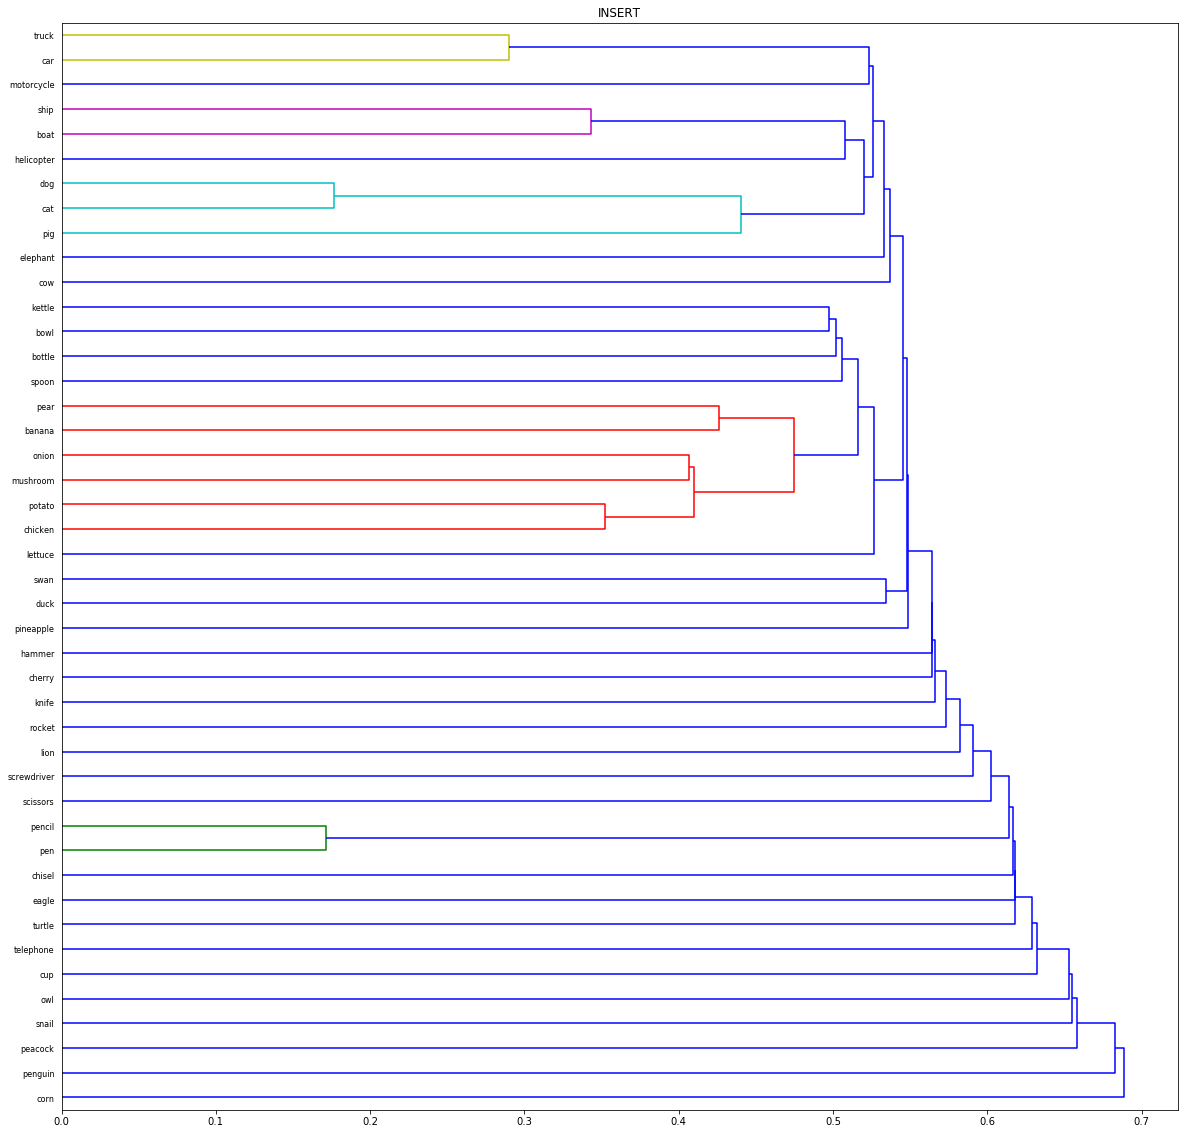

In [21]:
plt.subplots(figsize=(20,20))
plt.title("INSERT")
x = linkage(matrix1_bnc, method='single', metric='cosine')
cluster = fcluster(x, t=1000, criterion='maxclust')
cluster_output = pd.DataFrame({'Word':words1.tolist() , 'cluster':cluster})
print(cluster_output)
dendrogram(x, labels=words1, orientation= 'right');

           Word  cluster
0        banana        8
1          boat        3
2        bottle       27
3          bowl       23
4           car        1
5           cat       37
6        cherry       10
7       chicken       11
8        chisel       20
9          corn       29
10          cow       28
11          cup       25
12          dog       37
13         duck       35
14        eagle       32
15     elephant       39
16       hammer       18
17   helicopter        5
18       kettle       24
19        knife       19
20      lettuce       15
21         lion       33
22   motorcycle        7
23     mushroom       13
24        onion       14
25          owl       40
26      peacock       34
27         pear        9
28          pen       17
29       pencil       17
30      penguin       42
31          pig       38
32    pineapple       16
33       potato       12
34       rocket        6
35     scissors       22
36  screwdriver       21
37         ship        4
38        snail       30


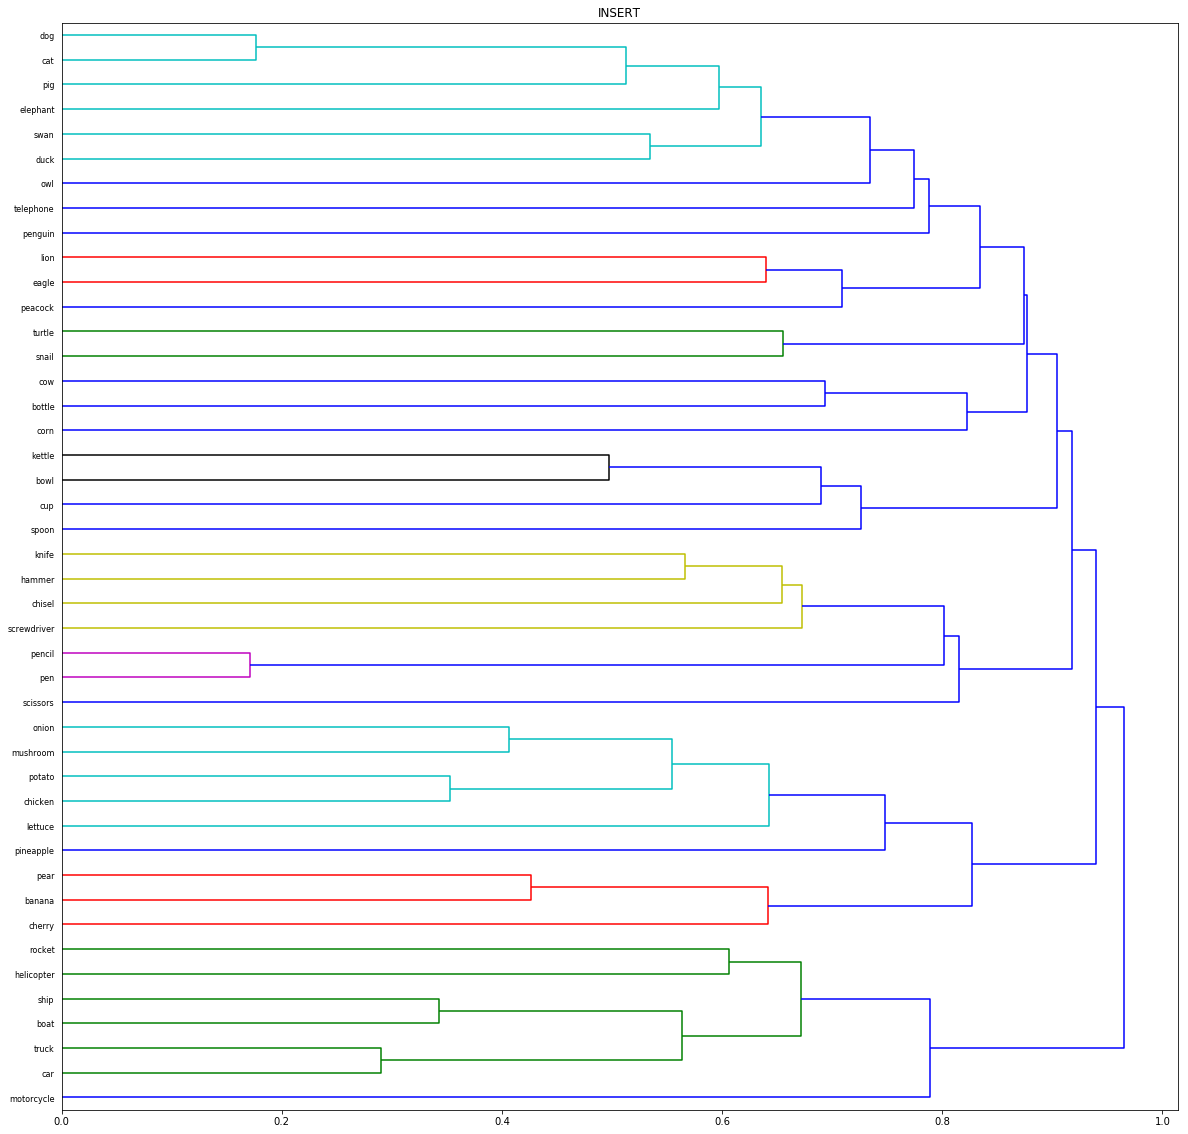

In [22]:
plt.subplots(figsize=(20,20))
plt.title("INSERT")
y = linkage(matrix1_bnc, method='complete', metric='cosine')
cluster = fcluster(y, t=1000, criterion='maxclust')
cluster_output = pd.DataFrame({'Word':words1.tolist() , 'cluster':cluster})
print(cluster_output)
dendrogram(y, labels=words1, orientation= 'right');

           Word  cluster
0        banana        1
1          boat       24
2        bottle        6
3          bowl        4
4           car       22
5           cat       30
6        cherry        3
7       chicken        8
8        chisel       21
9          corn       40
10          cow       38
11          cup       39
12          dog       30
13         duck       28
14        eagle       33
15     elephant       32
16       hammer       18
17   helicopter       26
18       kettle        5
19        knife       19
20      lettuce       12
21         lion       34
22   motorcycle       41
23     mushroom       10
24        onion       11
25          owl       37
26      peacock       36
27         pear        2
28          pen       17
29       pencil       17
30      penguin       16
31          pig       31
32    pineapple       13
33       potato        9
34       rocket       27
35     scissors       42
36  screwdriver       20
37         ship       25
38        snail       14


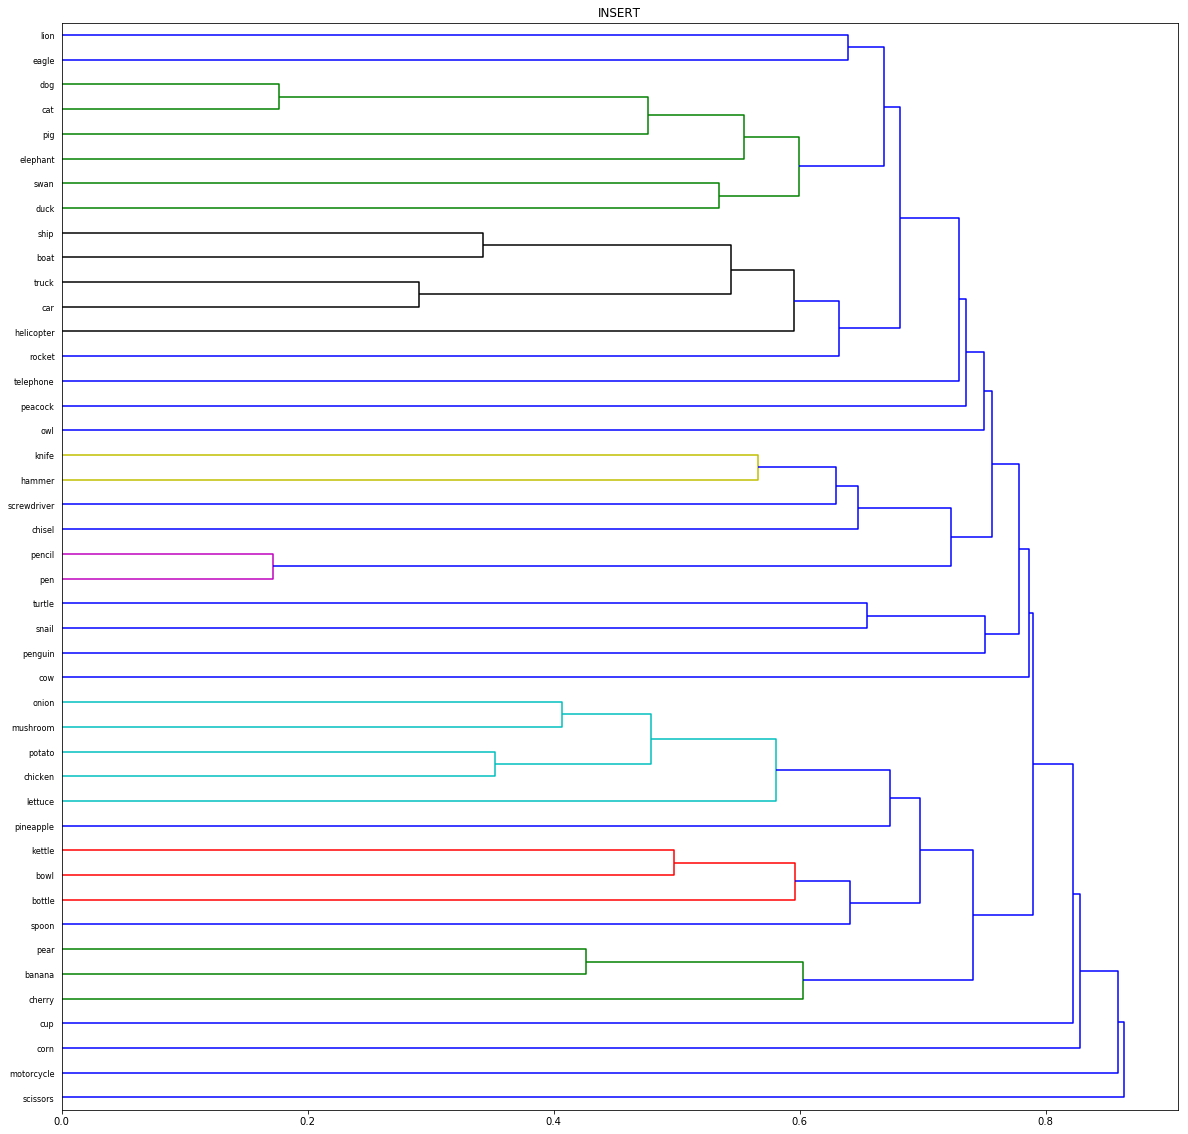

In [23]:
plt.subplots(figsize=(20,20))
plt.title("INSERT")
z = linkage(matrix1_bnc, method='average', metric='cosine')
cluster = fcluster(z, t=1000, criterion='maxclust')
cluster_output = pd.DataFrame({'Word':words1.tolist() , 'cluster':cluster})
print(cluster_output)
dendrogram(z, labels=words1, orientation= 'right');

>Not sure if a question was missing here

b) Which criterion do you think gives the most reasonable clusterings? Explain the differences between the criteria in your own words, and interpret their differences in clustering.

>The average clustering appears to give the most reasonable clustering as the words are grouped logically, for example, in groups of animals and vehicles. Single-linkage finds the words that create the smallest distance between clusters and uses those to link the two clusters. Complete-linkage finds the largest distance between words in a cluster and uses those two words to link the clusters together. Average-linkage calculates an average of the words in a cluster. Single-linkage has a very large number of clusters, complete-linkage has the smallest number of clusters and average has a number of clusters between the other two.

## Question 2 (10%) :  
a) Cluster the target words again, but this time on the basis of the vector representations obtained from McRae et al.’s data. Again, perform the clustering for all three criteria and answer questions (a)–(b) above. 

           Word  cluster
0        banana        3
1          boat       29
2        bottle        1
3          bowl       35
4           car       25
5           cat       23
6        cherry        6
7       chicken       13
8        chisel       34
9          corn        5
10          cow       22
11          cup        2
12          dog       23
13         duck       16
14        eagle       15
15     elephant       20
16       hammer       32
17   helicopter       38
18       kettle       40
19        knife       30
20      lettuce        7
21         lion       21
22   motorcycle       27
23     mushroom        8
24        onion        9
25          owl       17
26      peacock       14
27         pear        3
28          pen       36
29       pencil       41
30      penguin       11
31          pig       24
32    pineapple        4
33       potato       10
34       rocket       39
35     scissors       31
36  screwdriver       33
37         ship       28
38        snail       18


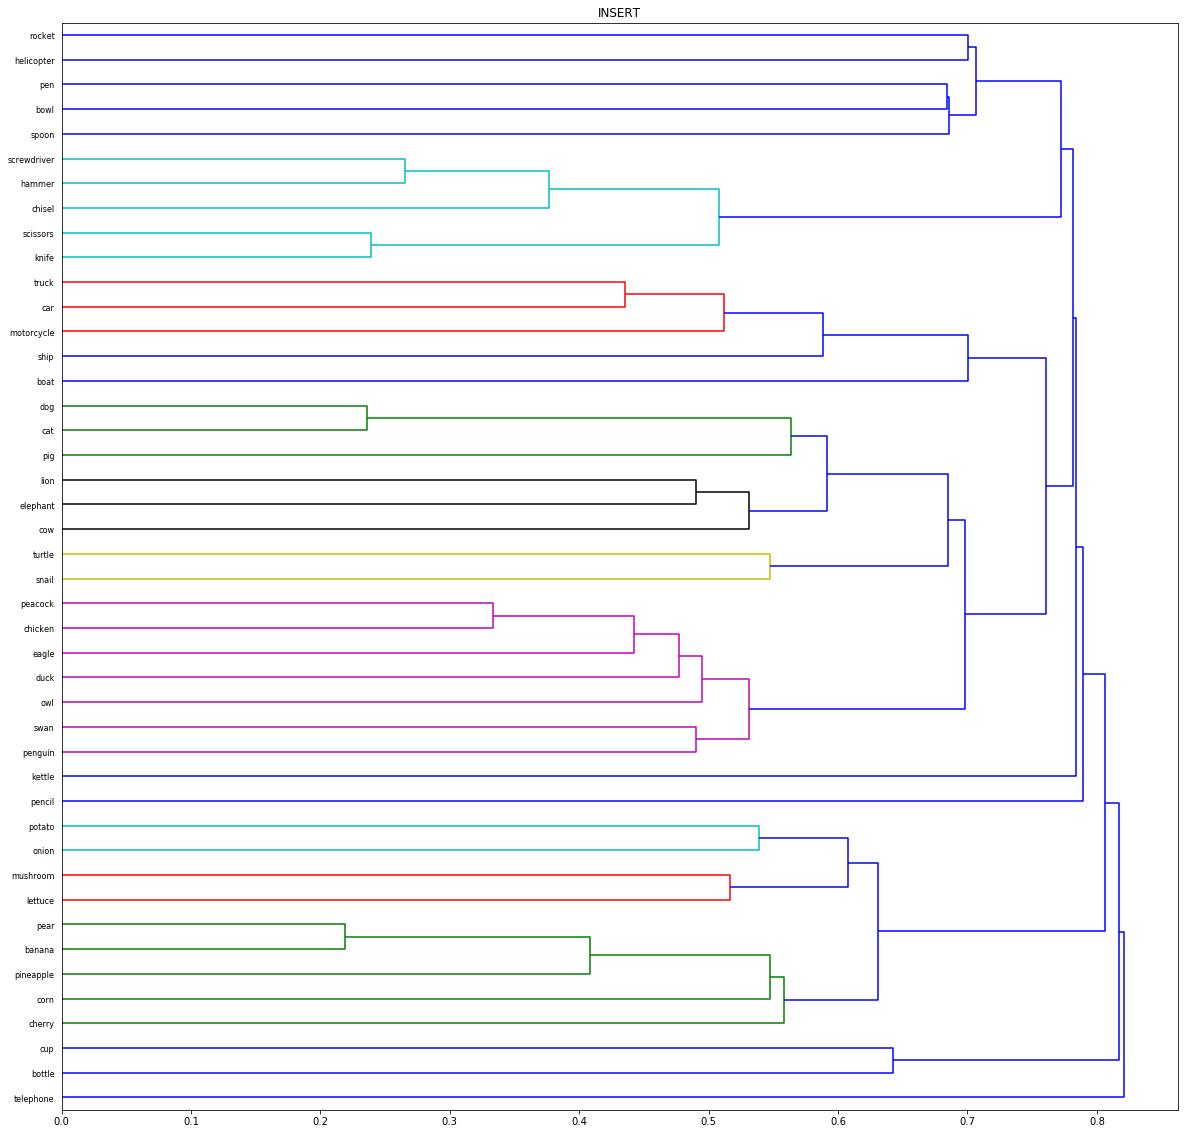

In [207]:
plt.subplots(figsize=(20,20))
plt.title("INSERT")
x = linkage(matrix1_mcrae, method='single', metric='cosine')
cluster = fcluster(x, t=1000, criterion='maxclust')
cluster_output = pd.DataFrame({'Word':words1.tolist() , 'cluster':cluster})
print(cluster_output)
dendrogram(x, labels=words1, orientation= 'right');

           Word  cluster
0        banana       35
1          boat       27
2        bottle        8
3          bowl       10
4           car        3
5           cat       40
6        cherry       37
7       chicken       13
8        chisel       26
9          corn       34
10          cow       42
11          cup        9
12          dog       40
13         duck       19
14        eagle       15
15     elephant       38
16       hammer       24
17   helicopter        6
18       kettle       20
19        knife       22
20      lettuce       30
21         lion       39
22   motorcycle        5
23     mushroom       31
24        onion       32
25          owl       16
26      peacock       14
27         pear       35
28          pen       11
29       pencil       29
30      penguin       17
31          pig       41
32    pineapple       36
33       potato       33
34       rocket        7
35     scissors       23
36  screwdriver       25
37         ship       28
38        snail        1


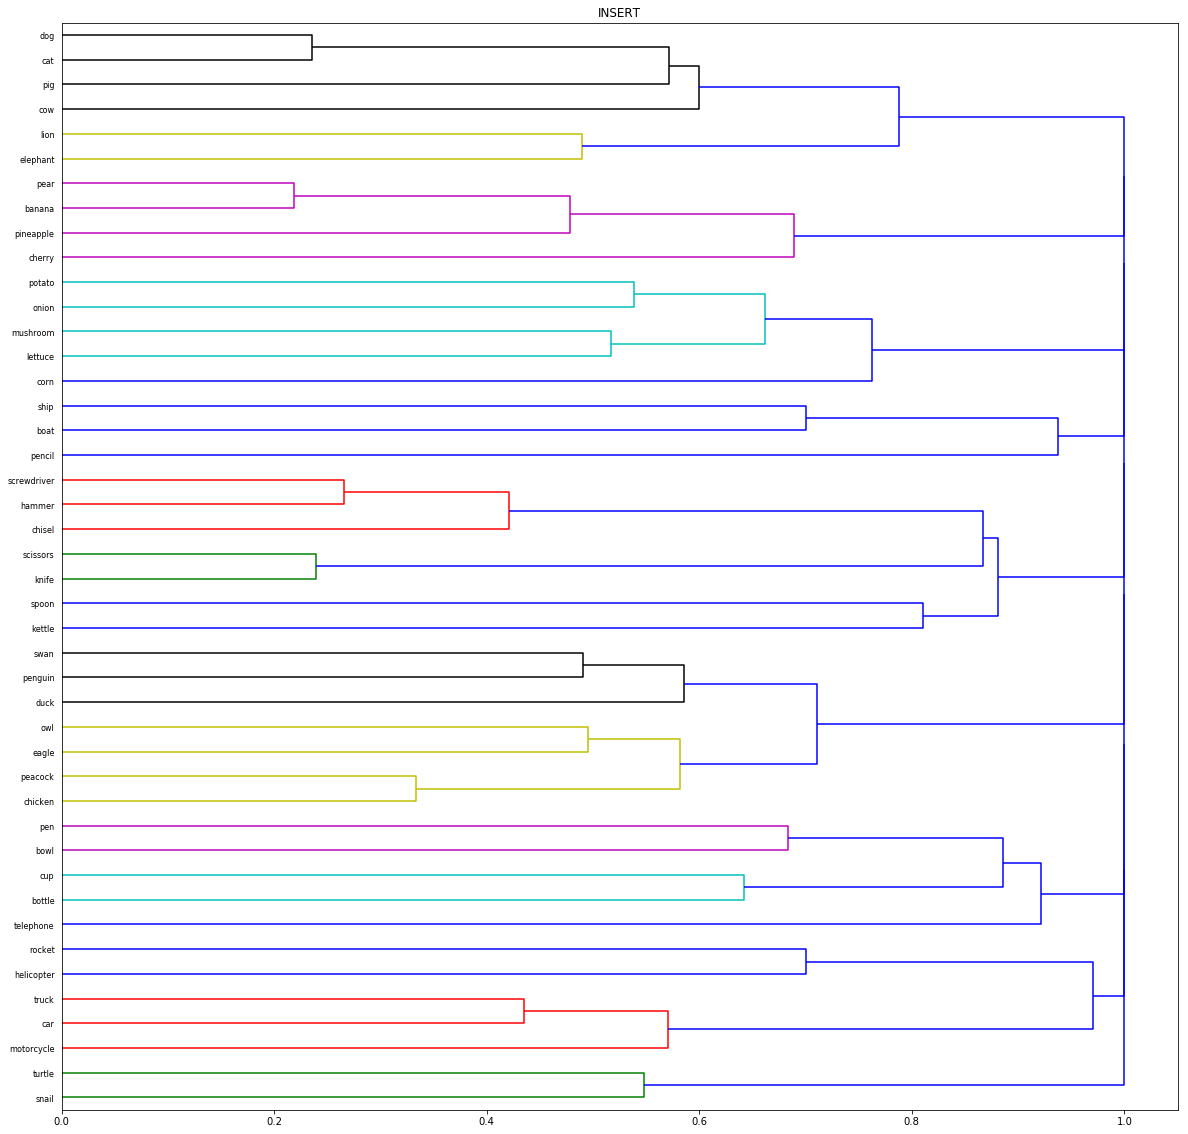

In [208]:
plt.subplots(figsize=(20,20))
plt.title("INSERT")
y = linkage(matrix1_mcrae, method='complete', metric='cosine')
cluster = fcluster(y, t=1000, criterion='maxclust')
cluster_output = pd.DataFrame({'Word':words1.tolist() , 'cluster':cluster})
print(cluster_output)
dendrogram(y, labels=words1, orientation= 'right');

           Word  cluster
0        banana       15
1          boat       27
2        bottle       37
3          bowl       39
4           car       24
5           cat       12
6        cherry       17
7       chicken        3
8        chisel       35
9          corn       22
10          cow       14
11          cup       38
12          dog       12
13         duck        9
14        eagle        5
15     elephant       10
16       hammer       33
17   helicopter       29
18       kettle       36
19        knife       31
20      lettuce       18
21         lion       11
22   motorcycle       26
23     mushroom       19
24        onion       20
25          owl        6
26      peacock        4
27         pear       15
28          pen       40
29       pencil       23
30      penguin        7
31          pig       13
32    pineapple       16
33       potato       21
34       rocket       30
35     scissors       32
36  screwdriver       34
37         ship       28
38        snail        1


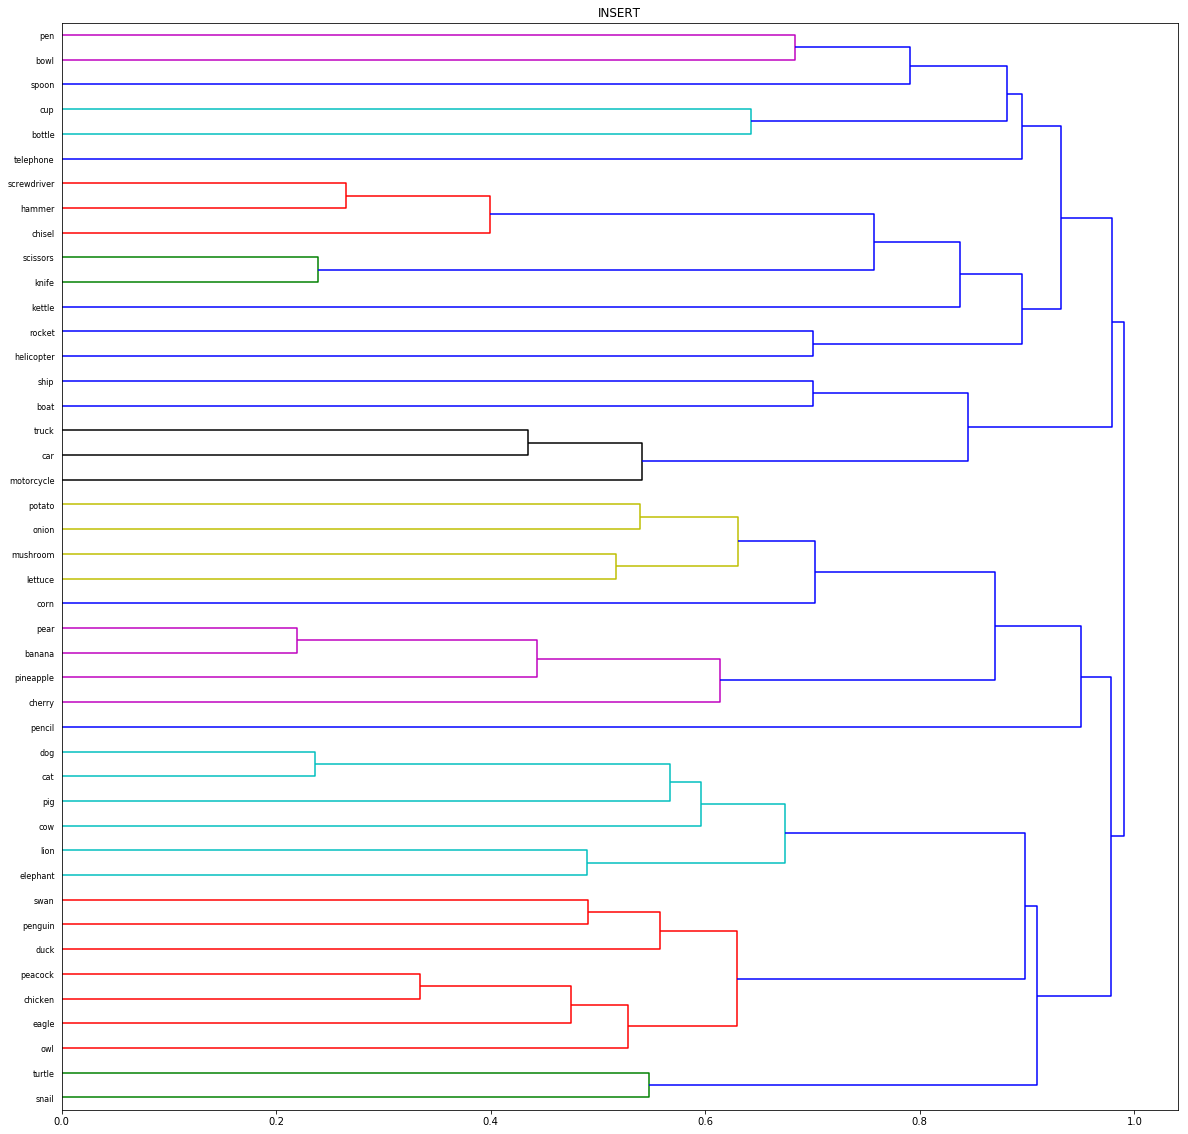

In [209]:
plt.subplots(figsize=(20,20))
plt.title("INSERT")
z = linkage(matrix1_mcrae, method='average', metric='cosine')
cluster = fcluster(z, t=1000, criterion='maxclust')
cluster_output = pd.DataFrame({'Word':words1.tolist() , 'cluster':cluster})
print(cluster_output)
dendrogram(z, labels=words1, orientation= 'right');

b) Which criterion gives the most reasonable clusterings according to the words helicopter and bottle? 

>For helicopter, the most reasonable clustering is complete as the word is paired with rocket, another air vehicle, and then that pair is linked to 'truck', 'car' and 'motorcycle', three other vehicles.

>For bottle, the most reasonable clustering is average as bottle is clustered with 'cup' and that cluster is matched with 'pen', 'bowl' and 'spoon' which are mostly related

## Question 3 (10%): 
a) How do the clusters obtained from the two vector representations (BNC and McRae) differ? Discuss which vector representations yields more intuitive and semantically coherent clusters, based on the clustering of the words helicopter and bottle. 

>For the clustering of 'helicopter' BNC is significantly better as it is paired with 'rocket' and then that cluster is matched with a cluster of other vehicles or clusters of animals. In McRae a cluster of 'helicopter' and 'rocket' is clustered with a group of cutlery or tools. In one of the cases in McRae the 'helicopter' was clustered with a few vehicles.
>In the case of the word 'bottle' the clusterings are quite similar but I would argue that McRae is slightly better. In most cases 'bottle' is matched with 'cup' and then further clustered with cutlery and eating implements.

b) What can you infer from the clustering with respect to the semantic category of chicken? Which representation (based on the BNC or McRae’sfeature norms) do you think yields a better clustering for it? 


>For BNC 'chicken' is clustered with types of grown food while with McRae 'chicken' is grouped with other types of bird. I would say that McRae yields a better clustering as chicken fits better with birds as the food it is clustered with in BNC is all grown and not an animal.

## Question 4 (10%) 
Finally, compare the clusterings you obtain for BNC and McRae vectors against the provided human-produced gold standard classifications.

The gold standard classifications were obtained by presenting the words to human participants asking them to name the category to which each noun belonged. Participant responses were freeform strings, i.e., participants were not provided with a list of possible categories. After adjusting for differences in spelling and grouping together synonyms, these responses were used to determine the most “correct” category label for each of the  nouns.

To make things easier, only look at the clusters obtained when setting the maximum number of clusters to 6 (which corresponds to the number of most fine-grained gold clusters). 

In [36]:
# let's import the human classifications
human_classification_names = pd.read_csv("./categories.txt", index_col=0)

In [59]:
# recompute BNC and McRae vector clusters using 6 as maximum number of clusters
x = linkage(matrix1_bnc, method='single', metric='cosine')
bncclusterx = fcluster(x, t=6, criterion='maxclust')

y = linkage(matrix1_bnc, method='complete', metric='cosine')
bncclustery = fcluster(y, t=6, criterion='maxclust')

z = linkage(matrix1_bnc, method='average', metric='cosine')
bncclusterz = fcluster(z, t=6, criterion='maxclust')

cluster_output = pd.DataFrame({'Word':words1.tolist() , 'single cluster':bncclusterx, 'complete cluster':bncclustery, 'average cluster':bncclusterz})
print(cluster_output)

           Word  average cluster  complete cluster  single cluster
0        banana                1                 2               1
1          boat                2                 1               1
2        bottle                1                 5               1
3          bowl                1                 4               1
4           car                2                 1               1
5           cat                2                 6               1
6        cherry                1                 2               1
7       chicken                1                 2               1
8        chisel                2                 3               1
9          corn                4                 5               6
10          cow                2                 5               1
11          cup                3                 4               1
12          dog                2                 6               1
13         duck                2                 6            

In [60]:
x = linkage(matrix1_mcrae, method='single', metric='cosine')
mcclusterx = fcluster(x, t=6, criterion='maxclust')

y = linkage(matrix1_mcrae, method='complete', metric='cosine')
mcclustery = fcluster(y, t=6, criterion='maxclust')

z = linkage(matrix1_mcrae, method='average', metric='cosine')
mcclusterz = fcluster(z, t=6, criterion='maxclust')

cluster_output = pd.DataFrame({'Word':words1.tolist() , 'single cluster':mcclusterx, 'complete cluster':mcclustery, 'average cluster':mcclusterz})
print(cluster_output)

           Word  average cluster  complete cluster  single cluster
0        banana                2                 1               2
1          boat                4                 1               3
2        bottle                6                 1               1
3          bowl                6                 1               3
4           car                4                 1               3
5           cat                1                 1               3
6        cherry                2                 1               2
7       chicken                1                 1               3
8        chisel                5                 1               3
9          corn                2                 1               2
10          cow                1                 1               3
11          cup                6                 1               1
12          dog                1                 1               3
13         duck                1                 1            

Compare the clusterings to the gold standard by inspecting the data. To do this, you can use the function "print_clusters" below to inspect the clusters. The function takes the vector of words and a vector of cluster indeces as input and prints the clusters together.

In [94]:
def print_clusters(words_vector, cluster_indeces):
    # iterate through categories
    for category_index in range(1,7):
        # iterate through all the classifications
        for index, category in enumerate(cluster_indeces):
            # if the word belongs to the current category (1-6), print it 
            if category == category_index:
                print (words_vector[index])
        print () 

In [105]:
def print_clusters1(words_vector, cluster_indeces):
    # iterate through categories
    xy = np.array([])
    
    for category_index in range(1,7):
        # iterate through all the classifications
        for index, category in enumerate(cluster_indeces):
            # if the word belongs to the current category (1-6), print it 
            if category == category_index:
                xy = np.append(xy,words_vector[index])
        xy = np.append(xy," ")
        
    return xy

In [112]:
#print(human_classification_names)
#print(matrix1_mcrae)
#print_clusters(words1, bncclusterx)
#print_clusters(words1, bncclustery)
#print(print_clusters1(words1, bncclusterx))
#print_clusters(words1, bncclusterz)
cluster_output = pd.DataFrame({ 'single cluster':print_clusters1(words1, bncclusterx), 'complete cluster':print_clusters1(words1, bncclustery), 'average cluster':print_clusters1(words1, bncclusterz)})
print(cluster_output)
#print_clusters(words1, mcclusterx)
#print_clusters(words1, mcclustery)
#print_clusters(words1, mcclusterz)
cluster_output = pd.DataFrame({ 'single cluster':print_clusters1(words1, mcclusterx), 'complete cluster':print_clusters1(words1, mcclustery), 'average cluster':print_clusters1(words1, mcclusterz)})
print(cluster_output)

   average cluster complete cluster single cluster
0           banana             boat         banana
1           bottle              car           boat
2             bowl       helicopter         bottle
3           cherry       motorcycle           bowl
4          chicken           rocket            car
5           kettle             ship            cat
6          lettuce            truck         cherry
7         mushroom                         chicken
8            onion           banana         chisel
9             pear           cherry            cow
10       pineapple          chicken            cup
11          potato          lettuce            dog
12           spoon         mushroom           duck
13                            onion          eagle
14            boat             pear       elephant
15             car        pineapple         hammer
16             cat           potato     helicopter
17          chisel                          kettle
18             cow           ch

Can you draw any conclusions regarding which semantic space representation (BNC vs McRae) and which clustering criterion works best? Discuss below.

>Regarding BNC the complete cluster appears to work best as it groups the words into five logical clusters consisting of 'vehicles', 'food', 'tools', 'cutlery' and 'animals'. One of the clusters does not follow much of a patters and there are a few mistakes in the clusters, for example 'telephone' being paired with other animals, but overall the clustering is very good.

>For McRae the clustering that works best is the average cluster. Once again, five logical clusters are created, 'animals', 'food', 'vehicles', 'tools' and 'cutlery' with 'pencil' being in a cluster on it's own. 

>Overall I would say that the best overall representation is the McRae average clusters as it appears to have the most words grouped together in a sensible manner.

# Task 2: Exemplar-based Model
In this task you will identify the semantic category of new words based on established categories of known words. You will do this by building an **exemplar-based model** that identifies the category of each new word by comparing it with known exemplars, again on the basis of their semantic space representations. Specifically, the model determines the category of a new word as follows:

- It measures the new word's pairwise similarity to all known exemplars. This is done by computing the cosine similarity (i.e., cosine of the angle) between the new word’s vector representation and the vector representation of each known exemplar.


- It then assigns the new word the category of the exemplar that yielded the highest similarity score.


In Task 1, you worked with the known exemplars. 
The data for Task 2 contains the new target words you want to find categories for. In this task you will additionally use the files **categorynames.csv** and **categoryindices.csv** which lists the semantic category of every target word in the Task1. 

The categories (obtained from [here](http://wordspace.collocations.de/doku.php/data:esslli2008:concrete_%20nouns_categorization)) are six in total (e.g., bird-animalnatural,vehicle-artifact-artifact). They are organised hierarchically: from top classes (i.e. artifact and natural) to more finegrained categories (e.g. groundAnimal or fruitTree).

**category_names** (corresponding to the **categorynames.csv** file) is a column vector with one category name per row and **category_indices** (corresponding to the **categoryindices.csv** file) is a column vector which indexes each target word in **words1** with a category number ranging from 1 to 6. The index itself corresponds to the row number in **categorynames**.

In [287]:
# We import the different files for task 2
words2 = pd.read_csv("./words2.csv", index_col=0).values.flatten()
feats_mcrae = pd.read_csv("./feats_mcrae.csv", index_col=0).values.flatten()
matrix2_mcrae = pd.read_csv("./matrix2_mcrae.csv", index_col=0).as_matrix()
matrix2_bnc = pd.read_csv("./matrix2_bnc.csv", index_col=0).as_matrix()

In [288]:
print(words2)
print(matrix2_bnc)

['airplane' 'bathtub' 'belt' 'blueberry' 'broccoli' 'calf' 'hawk' 'dagger'
 'fork' 'guitar' 'house' 'missile' 'razor' 'salmon' 'tank' 'worm']
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [16 17 19 ...,  0  0  0]
 ..., 
 [12 20 29 ...,  0  0  0]
 [26 19 38 ...,  0  0  0]
 [ 9  6  8 ...,  0  0  0]]


In [289]:
# we import the files relating to **categories**
category_names = pd.read_csv("./categorynames.csv", index_col=0).values.flatten()
category_indices = pd.read_csv("./categoryindices.csv", index_col=0).values.flatten()

In [290]:
print(category_names)
print(category_indices)
print(np.size(category_indices))

['bird-animal-natural' 'fruitTree-vegetable-natural'
 'green-vegetable-natural' 'groundAnimal-animal-natural'
 'tool-artifact-artifact' 'vehicle-artifact-artifact']
[1 5 4 4 5 3 1 0 4 2 3 4 3 0 0 3 4 5 4 4 2 3 5 2 2 0 0 1 4 4 0 3 1 2 5 4 4
 5 3 4 0 4 5 3]
44


## Question 5 (15%)
Implement the exemplar-based model as described above. Apply your implementation to predict the categories for the new words in words2, using the
vector space from McRae et al.’s data. Inspect the output of your model manually. Based on your intuitions discuss which words you think were correctly classified, and which ones
weren’t. Can you think of an explanation for the classifications and misclassifications?

In [291]:
# first implement the cosine similarity function
def cosine_sim(M1,M2):
    # implement computation of cosine similarity between M1 and M2 here
    similarity = np.dot(M1,M2)/(np.linalg.norm(M1)*np.linalg.norm(M2))
    return similarity

In [292]:
print(words2)

['airplane' 'bathtub' 'belt' 'blueberry' 'broccoli' 'calf' 'hawk' 'dagger'
 'fork' 'guitar' 'house' 'missile' 'razor' 'salmon' 'tank' 'worm']


In [300]:
# Implement the exemplar-based categorisation model here. 
def exemplar_model(exemplar_matrix, target_matrix, words2categorise):    
    predictedCatIndices = [] 
    
    for index1 in range(0,16):
        x=0
        for index2 in range(0,43):
            if cosine_sim(target_matrix[index1],exemplar_matrix[index2]) > cosine_sim(target_matrix[index1],exemplar_matrix[x]):
                x = index2
    
        predictedCatIndices.append(x)
    
    return predictedCatIndices

## Question 6  (10%)
Use your exemplar model to predict the categories for the new words, this time with the vector space constructed from the BNC. 


In [302]:
words2cat = []
x = exemplar_model(matrix1_bnc, matrix2_bnc, category_indices)

for index in range (0,16):
    words2cat.append(category_names[category_indices[x[index]]])
    
exemplar_output = pd.DataFrame({'word':words2, 'category':words2cat})
print(exemplar_output)

                       category       word
0     vehicle-artifact-artifact   airplane
1        tool-artifact-artifact    bathtub
2     vehicle-artifact-artifact       belt
3           bird-animal-natural  blueberry
4       green-vegetable-natural   broccoli
5   groundAnimal-animal-natural       calf
6     vehicle-artifact-artifact       hawk
7        tool-artifact-artifact     dagger
8        tool-artifact-artifact       fork
9        tool-artifact-artifact     guitar
10    vehicle-artifact-artifact      house
11    vehicle-artifact-artifact    missile
12       tool-artifact-artifact      razor
13          bird-animal-natural     salmon
14       tool-artifact-artifact       tank
15          bird-animal-natural       worm


# Which words were correctly classified, and which ones weren’t?  
Can you think of an explanation for the classifications and misclassifications?

In [308]:
print(words1)
print(words2)

['banana' 'boat' 'bottle' 'bowl' 'car' 'cat' 'cherry' 'chicken' 'chisel'
 'corn' 'cow' 'cup' 'dog' 'duck' 'eagle' 'elephant' 'hammer' 'helicopter'
 'kettle' 'knife' 'lettuce' 'lion' 'motorcycle' 'mushroom' 'onion' 'owl'
 'peacock' 'pear' 'pen' 'pencil' 'penguin' 'pig' 'pineapple' 'potato'
 'rocket' 'scissors' 'screwdriver' 'ship' 'snail' 'spoon' 'swan'
 'telephone' 'truck' 'turtle']
['airplane' 'bathtub' 'belt' 'blueberry' 'broccoli' 'calf' 'hawk' 'dagger'
 'fork' 'guitar' 'house' 'missile' 'razor' 'salmon' 'tank' 'worm']


>'airplane', 'bathtub', 'broccoli', 'calf', 'dagger', 'fork', 'guitar', 'razor' and 'tank' were all classified correctly.
>'airplane' is quite similar to a helicopter which might explain why it was correctly classified. 'broccoli' is similar to 'corn', 'lettuce', 'mushroom', 'onion' and 'potato'. 'calf' was correctly related most likely because of 'cow' as they are the same animal. 'fork', 'dagger' and 'razor' were correctly classified due to 'knife' and 'spoon' in words1. 

>'belt', 'blueberry', 'hawk', 'house', 'missile', 'salmon', 'worm'
>It appears that 'blueberry', 'salmon' and 'worm' were all misclassified as birds and this could possibly be because they are all food that birds eat, therefore making them related to birds and there are no fish, berries or small animals in words1 that these words could have been matched with. 'hawk' could have been misclassified because of how fast they travel relative to other animals, making them similar to the speed of vehicles. 'missile' could also have been misclassified for a similar reason because it travels in the air, similarly to a rocket or helicopter, and move very quickly. 

## Question 7 (15%) 
Implement the Manhattan distance function. The [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) is the sum of absolute differences between points : 
$ \sum_{i=1}^{N} |x_i-y_i| $, where $x_i$ and $y_i$ are individual dimensions of vector $\mathbf{x}$ and $\mathbf{y}$, each of length $N$.

In [303]:
def manhattan_dist(M1,M2):
    x=0
    for i in range(0,np.size(M1)):
        x += abs(M1[i]-M2[i])
    return x

In [337]:
def manhattan_model(exemplar_matrix, target_matrix, words2categorise):    
    predictedCatIndices = [] 
    
    for index1 in range(0,16):
        x=0
        for index2 in range(0,43):
            if manhattan_dist(target_matrix[index1],exemplar_matrix[index2]) <  manhattan_dist(target_matrix[index1],exemplar_matrix[x]):
                x = index2
    
        predictedCatIndices.append(x)
    
    return predictedCatIndices

In [338]:
words2cat = []
y = manhattan_model(matrix1_bnc, matrix2_bnc, category_indices)
for index in range (0,16):
    words2cat.append(category_names[category_indices[y[index]]])
manhattan_output = pd.DataFrame({'word':words2, 'category':words2cat})
print(manhattan_output)

                       category       word
0        tool-artifact-artifact   airplane
1        tool-artifact-artifact    bathtub
2        tool-artifact-artifact       belt
3        tool-artifact-artifact  blueberry
4        tool-artifact-artifact   broccoli
5        tool-artifact-artifact       calf
6        tool-artifact-artifact       hawk
7        tool-artifact-artifact     dagger
8        tool-artifact-artifact       fork
9        tool-artifact-artifact     guitar
10    vehicle-artifact-artifact      house
11    vehicle-artifact-artifact    missile
12       tool-artifact-artifact      razor
13  fruitTree-vegetable-natural     salmon
14    vehicle-artifact-artifact       tank
15       tool-artifact-artifact       worm


In [326]:
print()
print(matrix1_bnc[8])
print(matrix1_mcrae[8])
print(category_names[category_indices[8]])
print(np.dot(matrix1_bnc[8],matrix1_bnc[8]))
print(matrix1_bnc[1])
print(matrix1_mcrae[1])
print(category_names[category_indices[1]])


[0 0 2 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
tool-artifact-artifact
1828
[95 68 50 ...,  0  0  0]
[0 0 0 ..., 0 0 0]
vehicle-artifact-artifact


In [306]:
words2cat = []
x = exemplar_model(matrix1_mcrae, matrix2_mcrae, category_indices)
for index in range (0,16):
    words2cat.append(category_names[category_indices[x[index]]])
exemplar_output = pd.DataFrame({ 'word':words2, 'category':words2cat})
print(exemplar_output)

                       category       word
0           bird-animal-natural   airplane
1           bird-animal-natural    bathtub
2        tool-artifact-artifact       belt
3   fruitTree-vegetable-natural  blueberry
4       green-vegetable-natural   broccoli
5   groundAnimal-animal-natural       calf
6           bird-animal-natural       hawk
7        tool-artifact-artifact     dagger
8        tool-artifact-artifact       fork
9        tool-artifact-artifact     guitar
10    vehicle-artifact-artifact      house
11    vehicle-artifact-artifact    missile
12       tool-artifact-artifact      razor
13          bird-animal-natural     salmon
14    vehicle-artifact-artifact       tank
15  groundAnimal-animal-natural       worm


In [307]:
words2cat = []
y = manhattan_model(matrix1_mcrae, matrix2_mcrae, category_indices)
for index in range (0,16):
    words2cat.append(category_names[category_indices[y[index]]])
manhattan_output = pd.DataFrame({'word':words2, 'category':words2cat})
print(manhattan_output)

                       category       word
0     vehicle-artifact-artifact   airplane
1        tool-artifact-artifact    bathtub
2     vehicle-artifact-artifact       belt
3   fruitTree-vegetable-natural  blueberry
4       green-vegetable-natural   broccoli
5   groundAnimal-animal-natural       calf
6           bird-animal-natural       hawk
7        tool-artifact-artifact     dagger
8        tool-artifact-artifact       fork
9        tool-artifact-artifact     guitar
10    vehicle-artifact-artifact      house
11    vehicle-artifact-artifact    missile
12       tool-artifact-artifact      razor
13       tool-artifact-artifact     salmon
14    vehicle-artifact-artifact       tank
15    vehicle-artifact-artifact       worm


a) How does the cosine similarity differ from the Manhattan distance similarity? Give a pair of vectors that are close according to cosine distance but far according to Manhattan distance.

In [312]:
print(cosine_sim([1,1,1],[100,100,100]))
print((manhattan_dist([1,1,1],[100,100,100])))

1.0
297


>The cosine similarity is a measure of the angle between vectors while the Manhattan distance similarity is a measure of the distance between vectors. An example would be the vectors [1,1,1] and [100,100,100].

b) Look at the differences in classification for the McRae and BNC data when using the two different distance measures. 

>For BNC the Manhattan similarity classified most of the words as tools. In contrast the cosine similarity did a better job at classifying the words but did still make a number of mistakes, though the misclassified words did have a wide range of categories compared to the Manhattan similarity.

>With McRae the two results are quite similar when compared to BNC. The Manhattan similarity performed better than with BNC but did still label a large number of words as tools. The cosine similarity performed well, only misclassifying five words.

>In all four 'house' and 'missile' were both misclassified as vehicles.

Try to explain the differences in classification.

>The Manhattan similarity misclassifying many words as tools with McRae and BNC is likely due to the large number of zeros in the tool's vectors which would make the similarity very large. This fact about the tool's vectors would not effect the cosine similarity as it is only depends on direction.

## Question 8 (15%)
Compare the predictions of the two semantic spaces. Which semantic space is better at inferring the categories of the new words? What limitations do you see with these representations? Can you think of ways to overcome them?

>McRae is better at inferring categories of new words as it had fewer mistakes with both similarity functions.

>Human error could influence the predictions when using McRae as it was humans thinking of categories for words. The categories that the words are assigned are quite generic and limited and some words may not fit any of the categories at all, a wider selection of categories could be created. Although, a potential probelm with a wider selection of more specific categories is that it could potentially lead to a significant increase in the number of incorrect predictions.

# More info


For more info about scipy, hierarchical clustering and matplotlib:
- [1] https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
- [2] https://docs.scipy.org/doc/scipy-0.18.1/reference/cluster.hierarchy.html
- [3] http://matplotlib.org/

<a id='References'></a>
# References

[1] K. McRae, G.S. Cree, M.S. Seidenberg, C. McNorgan. 2005. Semantic Feature Production
Norms for a Large Set of Living and Nonliving Things. Behavior Research
Methods, 37(4):547–59.


[2] The British National Corpus, version 3 (BNC XML Edition). 2007. Distributed by
Oxford University Computing Services on behalf of the BNC Consortium. http:
//www.natcorp.ox.ac.uk/.